<a href="https://colab.research.google.com/github/prosperjohn9/machine_learning/blob/main/DataMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply the following on a numerical dataset:

1) Classification on the dataset with SVM, Naïve Bayes and KNN. Display confusion matrix.

2) Replace some values in the dataset with NaN. Display the result of replacement.

3) Replace the NaN values you obtained in step 2 with mean of the corresponding column. Display the result of replacement.

4) Classification on the dataset you obtained in Step 3 with SVM, Naïve Bayes and KNN. Display confusion matrix.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the wine dataset
wine = datasets.load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Display the first few rows of the dataset
print("Display the Original Wine Dataset: ")
data

Display the Original Wine Dataset: 


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Task 1: Classification on the dataset with SVM, Naïve Bayes, and KNN, and display the confusion matrix

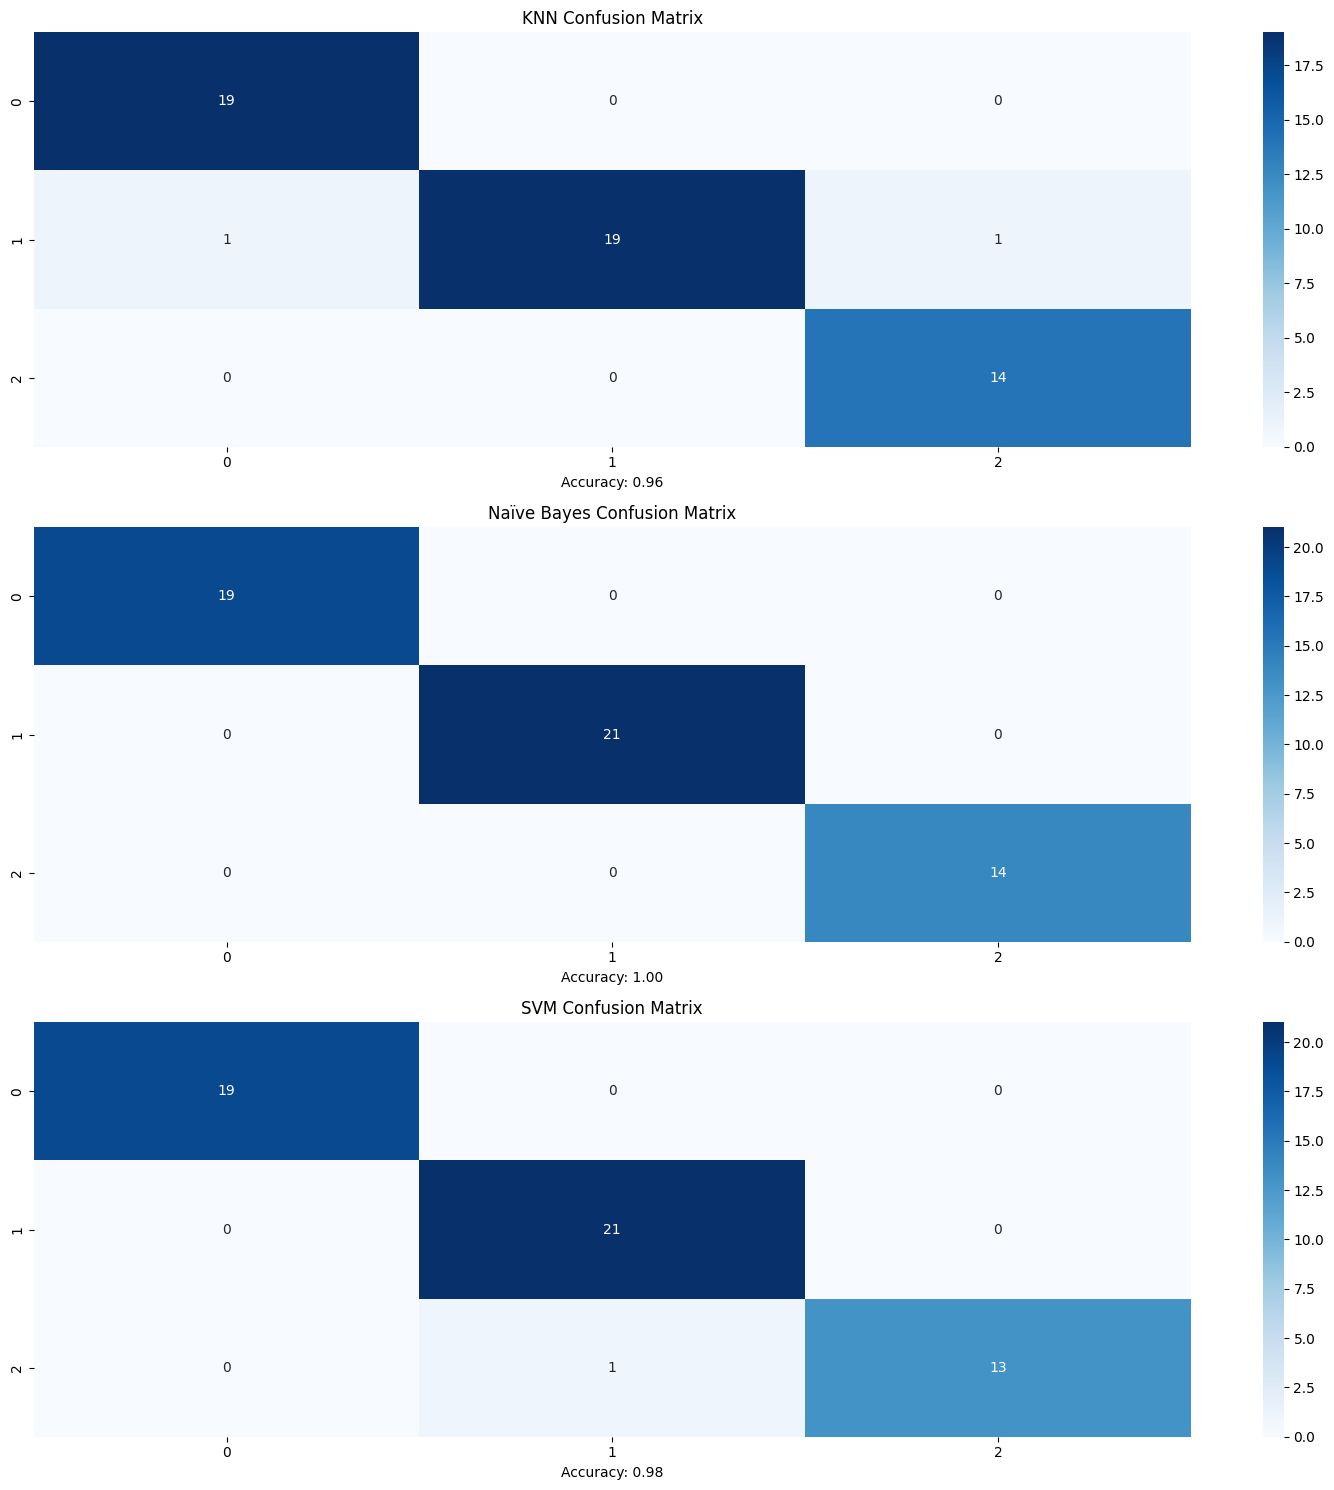

In [ ]:
# Split the dataset into features (X) and target label (y)
X = data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train classifiers
# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Naïve Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)

# Display confusion matrices using heatmaps
plt.figure(figsize=(15, 15))

# Display SVM Confusion Matrix and Accuracy Score
plt.subplot(313)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
sns.heatmap(svm_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('SVM Confusion Matrix')
plt.xlabel(f'Accuracy: {accuracy_score(y_test, svm_predictions):.2f}')

# Display Naïve Bayes Confusion Matrix and Accuracy Score
plt.subplot(312)
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
sns.heatmap(nb_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Naïve Bayes Confusion Matrix')
plt.xlabel(f'Accuracy: {accuracy_score(y_test, nb_predictions):.2f}')

# Display KNN Confusion Matrix and Accuracy Score
plt.subplot(311)
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
sns.heatmap(knn_confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('KNN Confusion Matrix')
plt.xlabel(f'Accuracy: {accuracy_score(y_test, knn_predictions):.2f}')

plt.tight_layout()
plt.show()

Task 2: Replace some values in the dataset with NaN and display the result of replacement

In [ ]:
# Replace a certain percentage of the data with NaN at random
np.random.seed(42)  # For reproducibility
num_elements_to_replace = int(data.size * 0.10)  # 10% of the data

# Generate random indices to replace with NaN
row_indices = np.random.randint(0, data.shape[0], size=num_elements_to_replace)
col_indices = np.random.randint(0, data.shape[1], size=num_elements_to_replace)


# Replace values in the DataFrame at the random indices with NaN
for row, col in zip(row_indices, col_indices):
  data.iat[row, col] = np.nan

# Display the DataFrame after replacing some values with NaN
print("DataFrame after replacing some random values with NaN:")
data

DataFrame after replacing some random values with NaN:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,NaN,2.29,5.64,1.04,3.92,1065.0
1,NaN,1.78,NaN,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,NaN
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,NaN,NaN,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,NaN,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,NaN,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,NaN,102.0,1.80,0.75,NaN,1.41,NaN,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Task 3: Replace the NaN values obtained in step 2 with the mean of the corresponding column and display the result

In [ ]:
# Calculate the mean of each column (ignores NaN) and round to 2 significant figures
column_means = data.mean().round(2)

# Replace NaN values with column means
data_filled = data.fillna(column_means)

# Display the DataFrame after replacing NaN values with column means
print("DataFrame after replacing NaN values with column means:")
data_filled

DataFrame after replacing NaN values with column means:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.60,127.0,2.80,3.06,0.36,2.29,5.64,1.04,3.92,1065.0
1,12.98,1.78,2.36,11.20,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,748.8
2,13.16,2.36,2.67,18.60,101.0,2.80,3.24,0.30,1.58,5.05,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.80,113.0,3.85,3.49,0.24,2.18,7.80,0.96,3.45,1480.0
4,13.24,2.59,2.87,21.00,118.0,2.80,2.69,0.36,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.50,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,19.48,102.0,1.80,0.75,0.36,1.41,5.05,0.70,1.56,750.0
175,13.27,4.28,2.26,20.00,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.00,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Task 4: Classification on the dataset from Step 3 with SVM, Naïve Bayes, and KNN, and display the confusion matrices

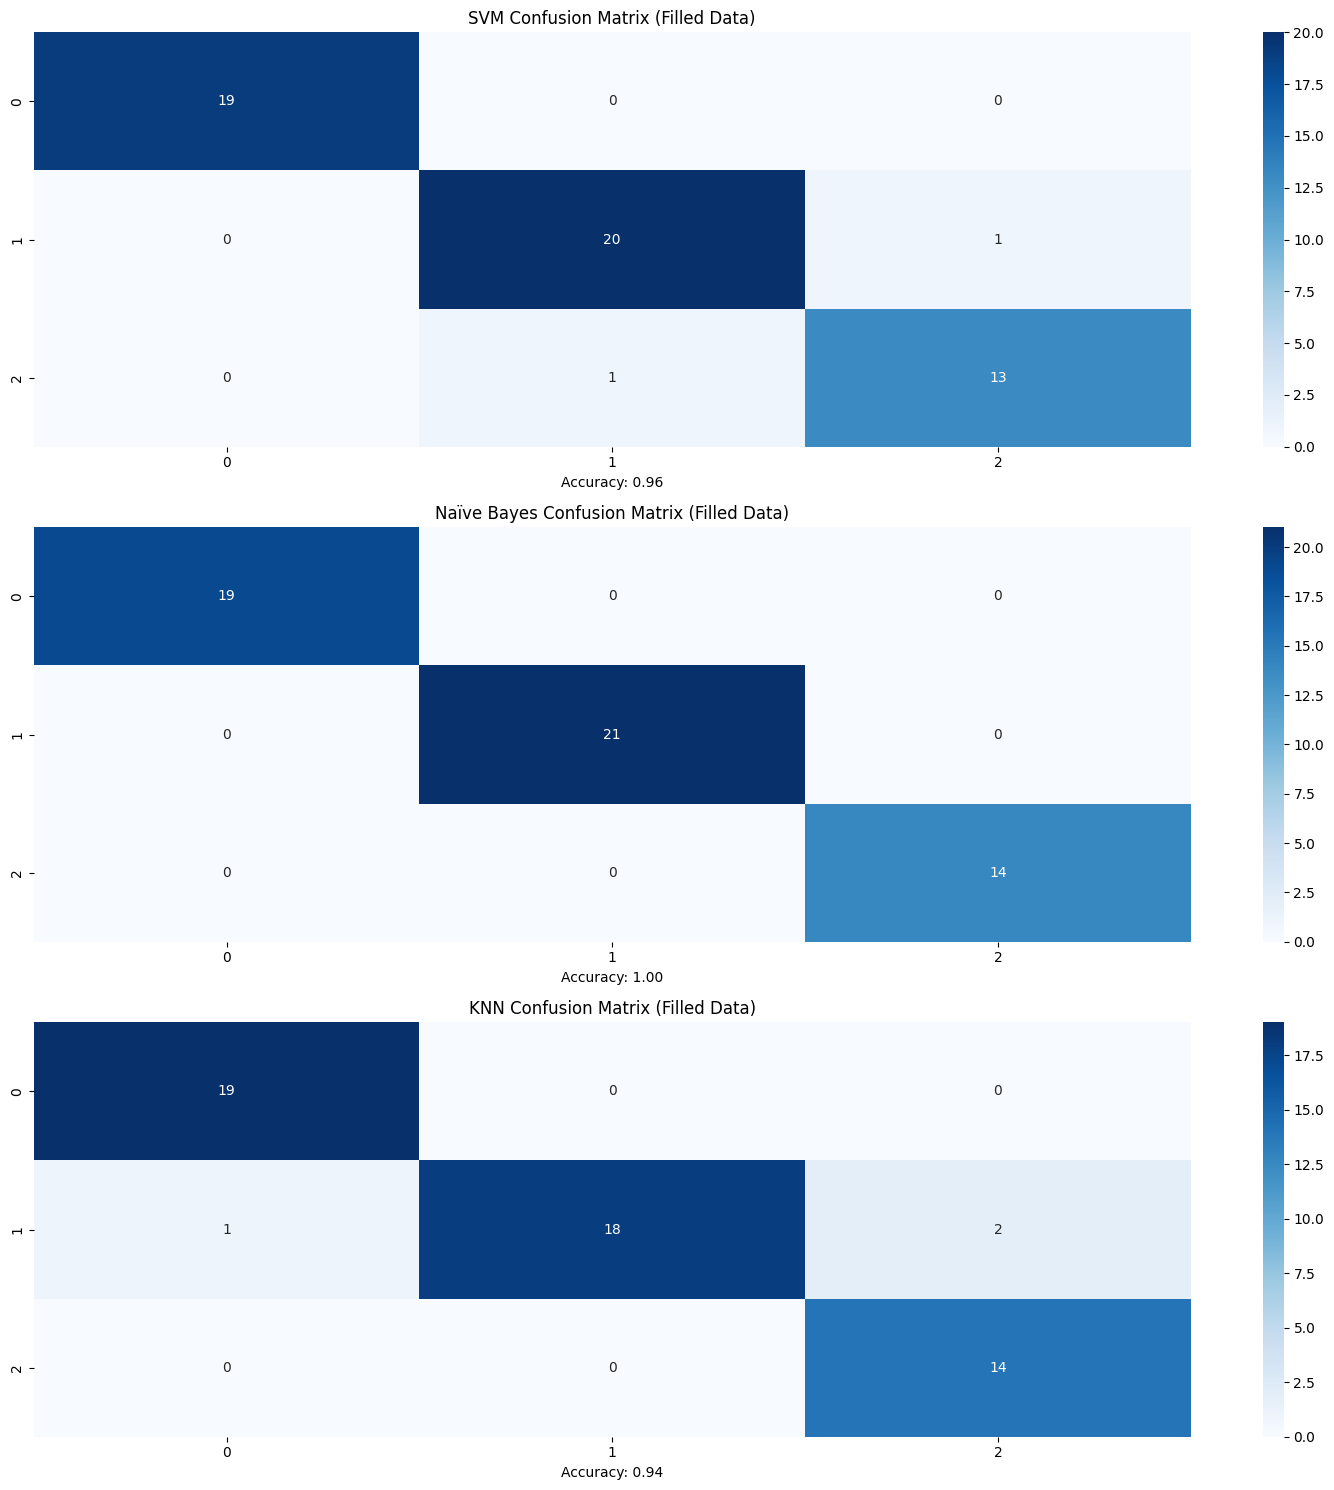

In [ ]:
# Split the modified dataset into training and testing sets
X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(data_filled, y, test_size=0.3, random_state=42)

# Standardize the modified dataset features
scaler_filled = StandardScaler()
X_train_filled = scaler_filled.fit_transform(X_train_filled)
X_test_filled = scaler_filled.transform(X_test_filled)

# Initialize and train classifiers on the modified dataset
# SVM
svm_classifier_filled = SVC()
svm_classifier_filled.fit(X_train_filled, y_train_filled)
svm_predictions_filled = svm_classifier_filled.predict(X_test_filled)

# Naïve Bayes
nb_classifier_filled = GaussianNB()
nb_classifier_filled.fit(X_train_filled, y_train_filled)
nb_predictions_filled = nb_classifier_filled.predict(X_test_filled)

# KNN
knn_classifier_filled = KNeighborsClassifier()
knn_classifier_filled.fit(X_train_filled, y_train_filled)
knn_predictions_filled = knn_classifier_filled.predict(X_test_filled)

# Display confusion matrices using heatmaps for the modified dataset
plt.figure(figsize=(15, 15))

# SVM Confusion Matrix (Filled Data)
plt.subplot(311)
svm_confusion_matrix_filled = confusion_matrix(y_test_filled, svm_predictions_filled)
sns.heatmap(svm_confusion_matrix_filled, annot=True, cmap='Blues', fmt='d')
plt.title('SVM Confusion Matrix (Filled Data)')
plt.xlabel(f'Accuracy: {accuracy_score(y_test_filled, svm_predictions_filled):.2f}')

# Naïve Bayes Confusion Matrix (Filled Data)
plt.subplot(312)
nb_confusion_matrix_filled = confusion_matrix(y_test_filled, nb_predictions_filled)
sns.heatmap(nb_confusion_matrix_filled, annot=True, cmap='Blues', fmt='d')
plt.title('Naïve Bayes Confusion Matrix (Filled Data)')
plt.xlabel(f'Accuracy: {accuracy_score(y_test_filled, nb_predictions_filled):.2f}')

# KNN Confusion Matrix (Filled Data)
plt.subplot(313)
knn_confusion_matrix_filled = confusion_matrix(y_test_filled, knn_predictions_filled)
sns.heatmap(knn_confusion_matrix_filled, annot=True, cmap='Blues', fmt='d')
plt.title('KNN Confusion Matrix (Filled Data)')
plt.xlabel(f'Accuracy: {accuracy_score(y_test_filled, knn_predictions_filled):.2f}')

plt.tight_layout()
plt.show()